# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, Modele linéaire

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.45455945 0.69957614 0.1934638 ]


In [3]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      1,
      -1,
      -1
], dtype=ctypes.c_float)

print(type(X))
print(Y)

<class 'numpy.ndarray'>
[ 1. -1. -1.]


In [4]:
X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y_plot = np.array([
      1,
      -1,
      -1
])

In [5]:
arr_size = len(X)

In [6]:
dimension = len(X[0])

In [7]:
learning_rate = ctypes.c_float(0.001)

In [8]:
epoch = 1000000

In [9]:
X_flat = X.flatten()

In [10]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [11]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [12]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [13]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.27455908  0.24357575 -0.34653628]
<class 'ctypes.wintypes.LP_c_float'>


In [14]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [15]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100* min(X_plot[:, 0]),100* max(X_plot[:, 0])) :
  for x2 in range(100*min(X_plot[:, 1]), 100*max(X_plot[:, 1])) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

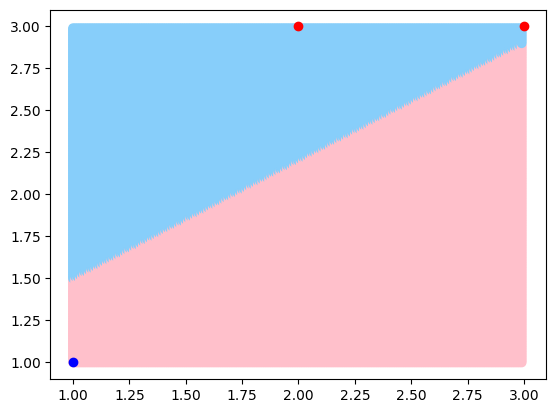

<Figure size 640x480 with 0 Axes>

In [16]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [17]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [18]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.45347118 0.2046771  0.1388284 ]


In [19]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0], dtype=ctypes.c_float)

X_plot = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y_plot = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

In [20]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [21]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [22]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [23]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [24]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.34747097 -0.06333676 -0.11083758]
<class 'ctypes.wintypes.LP_c_float'>


In [25]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [26]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100 , 300) :
  for x2 in range(100 , 300) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

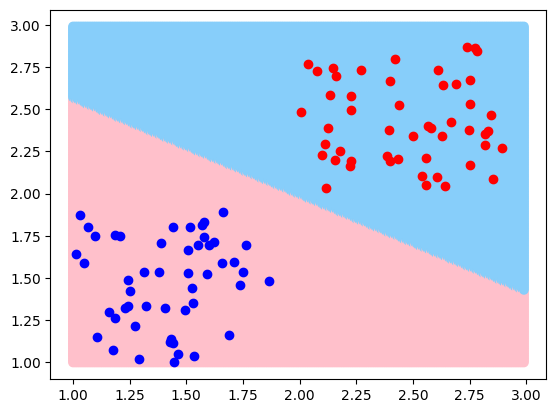

<Figure size 640x480 with 0 Axes>

In [27]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [28]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [29]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.27822053 0.12390649 0.6218244 ]


In [30]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype= ctypes.c_float)
Y = np.array([1, 1, -1, -1], dtype= ctypes.c_float)

X_plot = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y_plot = np.array([1, 1, -1, -1])

In [31]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [32]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [33]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [34]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [35]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[-1.7796759e-03 -9.3413983e-05  1.8252623e-03]
<class 'ctypes.wintypes.LP_c_float'>


In [36]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [37]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(0 , 100) :
  for x2 in range(0 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

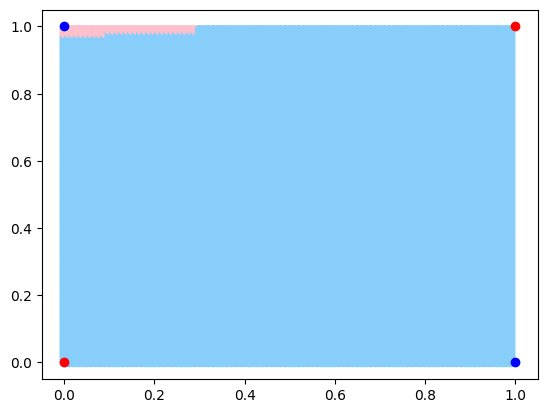

<Figure size 640x480 with 0 Axes>

In [38]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [39]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [42]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.26201582 0.97746575 0.21271718]


In [43]:
X = np.random.random((500, 2)) * 2.0 - 1.0
X = np.array(X, dtype= ctypes.c_float)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = np.array(Y, dtype= ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

In [44]:
print(X)
print(Y)

[[-6.01479150e-02 -7.09398746e-01]
 [ 2.44862378e-01 -9.06936824e-01]
 [-9.20402944e-01  7.32062995e-01]
 [ 6.73015118e-01 -6.67256340e-02]
 [ 1.28763132e-02 -1.39608517e-01]
 [ 9.17923689e-01  2.26761818e-01]
 [ 7.73199201e-01  7.08513558e-01]
 [-5.07814229e-01 -5.44248462e-01]
 [ 5.85042059e-01 -6.15078330e-01]
 [ 5.71958125e-01  2.28274316e-01]
 [-6.16022885e-01 -1.24893546e-01]
 [-4.44558002e-02 -7.12048709e-01]
 [-9.46323395e-01  6.07471347e-01]
 [ 1.15674205e-01  3.57831210e-01]
 [-3.51287127e-01 -9.30560946e-01]
 [-3.49191576e-01  2.34853357e-01]
 [-2.58451290e-02 -5.03467083e-01]
 [ 4.15851802e-01 -7.15536177e-01]
 [-8.15911591e-01 -1.75821647e-01]
 [ 1.47472262e-01  5.63617706e-01]
 [ 9.65678394e-01 -6.12592459e-01]
 [ 5.03765225e-01  6.58343613e-01]
 [ 8.19894493e-01 -9.17662442e-01]
 [ 8.88466358e-01 -8.35200369e-01]
 [-8.85392129e-01 -5.70093930e-01]
 [-4.73777026e-01  1.54248491e-01]
 [-2.35686988e-01  1.55109286e-01]
 [ 4.96338755e-01  8.62761319e-01]
 [-3.77478004e-02 -5

In [45]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [46]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [47]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [48]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [49]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.00201564 -0.00330864 -0.00077998]
<class 'ctypes.wintypes.LP_c_float'>


In [50]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [51]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

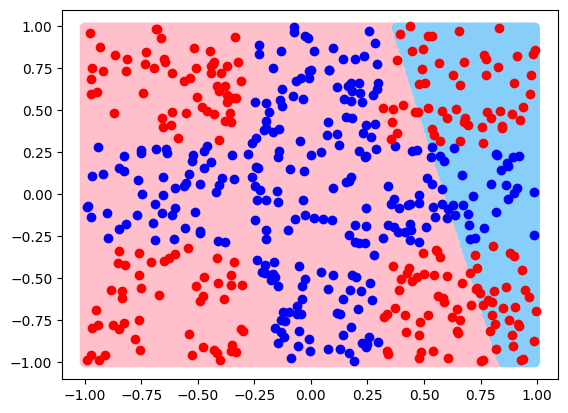

<Figure size 640x480 with 0 Axes>

In [52]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [19]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

ArgumentError: argument 1: <class 'TypeError'>: expected LP_c_float instance instead of int

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [2]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.16228116 0.9537487  0.3296535 ]


In [3]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

Y_1 = [x[0] for x in Y]
Y_2 = [x[1] for x in Y]
Y_3 = [x[2] for x in Y]


X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)
Y_1 = np.array(Y_1, dtype=ctypes.c_float)
Y_2 = np.array(Y_2, dtype=ctypes.c_float)
Y_3 = np.array(Y_3, dtype=ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X_plot])

X_plot = X_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]
Y_plot = Y_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]

In [4]:
print(Y_1)

[0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [5]:
print(Y_2)

[1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.

In [6]:
print(X)

[[-1.17980121e-02  7.71408379e-01]
 [-3.55649352e-01 -1.61855772e-01]
 [-7.77300894e-01 -9.50662434e-01]
 [ 9.99954998e-01  5.38628519e-01]
 [ 9.28915679e-01  7.82320857e-01]
 [-5.71027577e-01 -3.60232472e-01]
 [-8.64043534e-01  4.80380625e-01]
 [ 1.75714821e-01  2.73165345e-01]
 [-4.80139017e-01 -5.61135530e-01]
 [ 1.01427771e-01  4.80772182e-02]
 [ 2.79678077e-01 -6.32116616e-01]
 [-9.63913321e-01 -1.13256902e-01]
 [-6.49765015e-01  2.94355839e-01]
 [ 2.43100658e-01  5.75971663e-01]
 [ 6.02807999e-01  6.40452981e-01]
 [-8.88886392e-01 -2.49044210e-01]
 [ 2.17405677e-01 -4.06427324e-01]
 [ 1.56926498e-01  1.71214387e-01]
 [ 5.35316586e-01  9.58624780e-01]
 [-9.52592313e-01 -4.87246007e-01]
 [ 7.86169350e-01  9.17400599e-01]
 [ 9.41329241e-01 -1.92919392e-02]
 [-9.64940250e-01  9.09719646e-01]
 [ 4.06898558e-01  2.16687560e-01]
 [-4.98307049e-01  1.48224413e-01]
 [-1.76851213e-01  3.45839024e-01]
 [ 5.46870053e-01  8.01823914e-01]
 [ 5.05812764e-01  5.15279353e-01]
 [ 5.41461766e-01  8

In [7]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [8]:
print(len(X))
print(dimension)
print(learning_rate)
print(epoch)
print(X_flat)

399
2
c_float(0.0010000000474974513)
1000000
[-1.17980121e-02  7.71408379e-01 -3.55649352e-01 -1.61855772e-01
 -7.77300894e-01 -9.50662434e-01  9.99954998e-01  5.38628519e-01
  9.28915679e-01  7.82320857e-01 -5.71027577e-01 -3.60232472e-01
 -8.64043534e-01  4.80380625e-01  1.75714821e-01  2.73165345e-01
 -4.80139017e-01 -5.61135530e-01  1.01427771e-01  4.80772182e-02
  2.79678077e-01 -6.32116616e-01 -9.63913321e-01 -1.13256902e-01
 -6.49765015e-01  2.94355839e-01  2.43100658e-01  5.75971663e-01
  6.02807999e-01  6.40452981e-01 -8.88886392e-01 -2.49044210e-01
  2.17405677e-01 -4.06427324e-01  1.56926498e-01  1.71214387e-01
  5.35316586e-01  9.58624780e-01 -9.52592313e-01 -4.87246007e-01
  7.86169350e-01  9.17400599e-01  9.41329241e-01 -1.92919392e-02
 -9.64940250e-01  9.09719646e-01  4.06898558e-01  2.16687560e-01
 -4.98307049e-01  1.48224413e-01 -1.76851213e-01  3.45839024e-01
  5.46870053e-01  8.01823914e-01  5.05812764e-01  5.15279353e-01
  5.41461766e-01  8.96082580e-01 -5.68340778e

In [9]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [10]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_1_to_predict = (ctypes.c_float * len(Y_1))(*Y_1)
y_1_to_predict_ptr = ctypes.cast(y_1_to_predict, LP_c_float)

In [11]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_2_to_predict = (ctypes.c_float * len(Y_2))(*Y_2)
y_2_to_predict_ptr = ctypes.cast(y_2_to_predict, LP_c_float)

In [12]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_3_to_predict = (ctypes.c_float * len(Y_3))(*Y_3)
y_3_to_predict_ptr = ctypes.cast(y_3_to_predict, LP_c_float)

In [13]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]

my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [14]:
print(type(w_array_ptr))
print(type(y_1_to_predict_ptr))
print(type(x_to_predict_ptr))
print(type(arr_size))
print(type(dimension))
print(type(learning_rate))
print(type(epoch))

<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'int'>
<class 'int'>
<class 'ctypes.c_float'>
<class 'int'>


In [15]:
linear_model_training_ptr_1 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_1_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_1 = np.ctypeslib.as_array(
    linear_model_training_ptr_1, ((dimension + 1),)
)
print(trained_linear_model_1)
print(type(linear_model_training_ptr_1))

[-0.02371899 -0.04664148 -0.04638432]
<class 'ctypes.wintypes.LP_c_float'>


In [16]:
print(type(w_array_ptr))
print(type(y_1_to_predict_ptr))
print(type(x_to_predict_ptr))
print(type(arr_size))
print(type(dimension))
print(type(learning_rate))
print(type(epoch))

<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'int'>
<class 'int'>
<class 'ctypes.c_float'>
<class 'int'>


In [18]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_2 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_2 = np.ctypeslib.as_array(
    linear_model_training_ptr_2, ((dimension + 1),)
)
print(trained_linear_model_2)
print(type(linear_model_training_ptr_2))

[-0.00602364  0.00662171  0.8516463 ]
<class 'ctypes.wintypes.LP_c_float'>


In [19]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_3 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_3 = np.ctypeslib.as_array(
    linear_model_training_ptr_3, ((dimension + 1),)
)
print(trained_linear_model_3)
print(type(linear_model_training_ptr_3))

[-0.02802546  0.03135189  0.9507663 ]
<class 'ctypes.wintypes.LP_c_float'>


In [20]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [36]:
# predicted_labels_1 = []
# predicted_x1_1 = []
# predicted_x2_1 = []
# for x1 in range(-100 , 100) :
#   for x2 in range(-100 , 100) :
#     predicted_x1_1.append(x1/100)
#     predicted_x2_1.append(x2/100)
#     if x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0:
#         predicted_labels_1.append('pink')
#     else : predicted_labels_1.append('white')
#
# predicted_labels_2 = []
# predicted_x1_2 = []
# predicted_x2_2 = []
# for x1 in range(-100 , 100) :
#   for x2 in range(-100 , 100) :
#     predicted_x1_2.append(x1/100)
#     predicted_x2_2.append(x2/100)
#     if x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0:
#         predicted_labels_2.append('green')
#     else : predicted_labels_2.append('white')
#
# predicted_labels_3 = []
# predicted_x1_3 = []
# predicted_x2_3 = []
# for x1 in range(-100 , 100) :
#   for x2 in range(-100 , 100) :
#     predicted_x1_3.append(x1/100)
#     predicted_x2_3.append(x2/100)
#     if x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] >= 0:
#         predicted_labels_3.append('blue')
#     else : predicted_labels_3.append('white')

In [66]:
predicted_labs = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    if (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0)\
            and (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] < 0)\
            and (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] < 0):
        predicted_labs.append('aqua')
    elif (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0)\
            and (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] < 0)\
            and (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] < 0):
        predicted_labs.append('lightcoral')
    elif (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] >= 0)\
            and (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] < 0)\
            and (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] < 0):
        predicted_labs.append('chocolate')
    else :
        predicted_labs.append('limegreen')

In [61]:
print(predicted_x2)

[-1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.5

ValueError: 'c' argument has 10329 elements, which is inconsistent with 'x' and 'y' with size 40000.

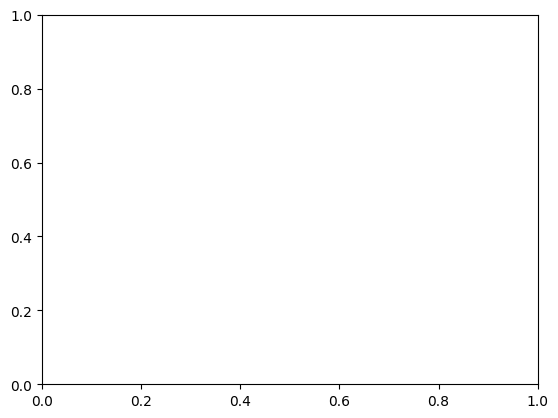

In [67]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labs)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [14]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

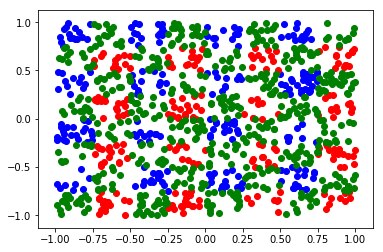

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

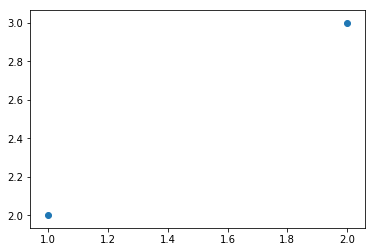

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

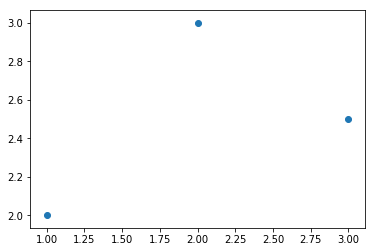

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

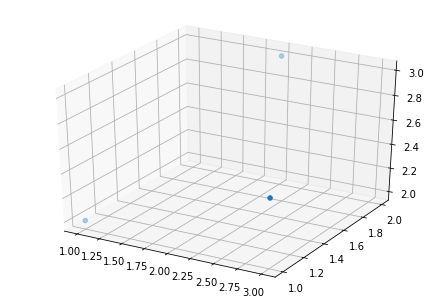

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

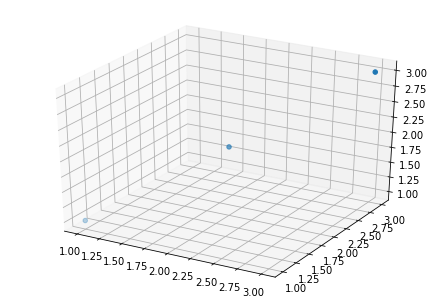

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

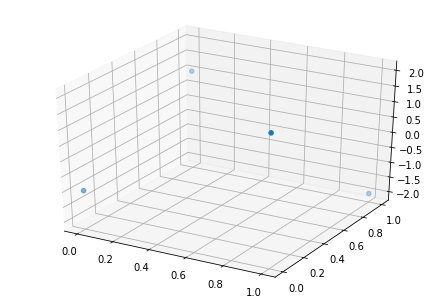

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()